# Machine Learning
***


### 우리는 학습 데이터만 이용한 전처리를 해야 한다.

#### 최종적으로 예측해야하는 데이터는 test데이터로 우리가 사전에 모르는 미지의 데이터이다.
#### 따라서 주어진 학습 데이터로만 전처리와 preprocessing을 하고 test에는 적용만 해야한다.

#### 학습 데이터로 주어진 데이터로 학습(train)과 검증(validation) 데이터를 만들어 모델을 학습 및 검증한 후 예측(test) 데이터로 값을 도출한다.

In [1]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

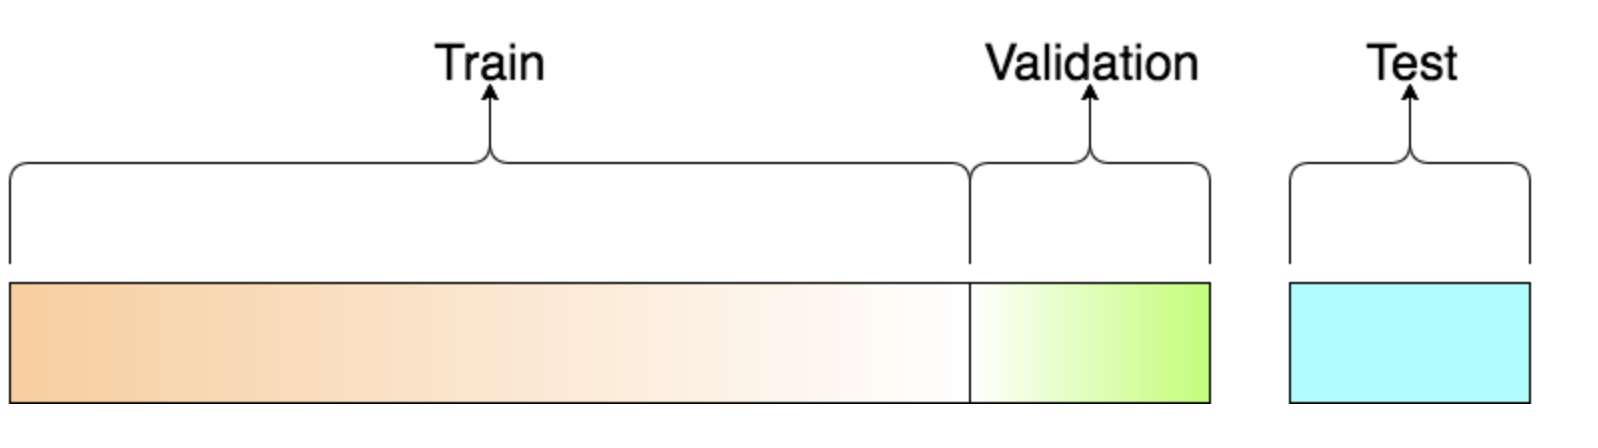

In [2]:
Image('데이터분할.png')

출처 : https://teddylee777.github.io/scikit-learn/train-test-split
***
### 가장 많이 하는 실수!!

- train, test 데이터를 합쳐서 scaling을 하거나 log transformation!
- train, test 데이터를 합친 데이터의 평균 혹은 중위값으로 결측치 처리!

#### 예를 들어 고객의 정보를 가지고 보험 이탈 여부를 예측할 때 어떤 고객이 무슨 정보를 가지는지 사전에 알 수 있을까? 당연히 알 수 없다.
#### 따라서 주어진 데이터로만 모델을 만들고 이를 신규 데이터(test) 예측에 사용해야 한다.

### 작업 2유형에서 주어진 모델링 문제에서는 <font color = 'red'> 절대로 모델이 test 데이터를 미리 알고 있는 상태로 만들면 안된다!
    
***
    
### Machine Learning의 각 프로세스를 알아보자.
    
- 문제에서는 우리가 예측해야할 변수와 평가지표를 모두 알려줄 것이다.
- 문제에 주어진 변수를 보고 회귀 혹은 분류를 결정하자.
    
#### Boston 집값 데이터를 활용하여 집값(target)을 예측하는 모델을 만든다고 하자.
- 506개 데이터 중 임의로 50개를 우리가 예측해야할 데이터로 만들고 남은 456개로 모델을 만들도록 가정한다.
    
#### 1. 모델링 방향 설정

In [4]:
from sklearn.datasets import load_boston
import pandas as pd

In [14]:
df = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
df['target'] = load_boston().target

In [18]:
train = df.loc[:456]
test = df.loc[456:]

임의로 train은 456개 test는 50개의 데이터를 만든다.

In [19]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


예측 대상인 target 변수를 살펴보자. head로만 봐도 연속형 변수로 회귀 모델링을 해야하는 것을 알 수 있다.

<AxesSubplot:>

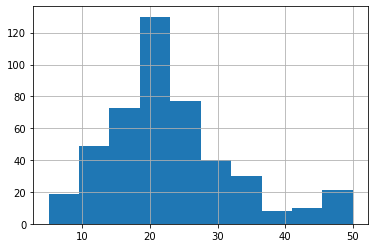

In [20]:
train.target.hist()

실제로 히스토그램을 그려봐도 굉장히 다양한 값들이 분포되어 있다.

회귀 모델링을 진행하도록 한다.
***

#### 2. 데이터 전처리

- train, test 각각 전처리를 해준다.
- 단위가 모두 다르므로 MinMaxScaling을 한다고 가정하자.

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [25]:
tr_scaled = scaler.fit_transform(train.iloc[:, :-1]) # target 컬럼을 제외하고 스케일링을 한다.

앞서 공부했듯이 모델링을 할 때는 학습데이터로 fit_transform을 하고 test 데이터는 transform만 한다.

In [26]:
te_scaled = scaler.transform(test.iloc[:, :-1]) # target 컬럼을 제외하고 스케일링을 한다.

***
#### 3. 학습 및 검증 데이터 분할

- 모델을 만들고 학습 및 검증을 하기 위해 데이터를 분할한다.
- 학습데이터에서 검증용으로 만든 데이터는 val이라는 용어를 사용하여 변수를 지정하자.

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
y = train['target']
actual = test['target']

In [30]:
X_train, X_val, y_train, y_val = train_test_split(tr_scaled, y, test_size = .25, random_state = 42)

학습 및 검증 데이터의 비율을 75 : 25로 맞추었다.
***
#### 4. 모델 설정

- 사용하고자 하는 모델을 결정한다.
- 대표적인 모델인 RandomForest, XGBoost, LightGBM을 기억하자.
- 회귀이기 때문에 각 알고리즘 뒤에 Regressor가 붙는다.

In [31]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [32]:
rf = RandomForestRegressor(random_state = 42)
lgbm = LGBMRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)

***
#### 5. 모델 학습
- 모델.fit(X, y)를 통해 학습을 진행한다.

In [33]:
rf.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

***
#### 6. 모델 검증
- validation을 위해 저장해둔 데이터로 모델을 검증한다.
- 회귀이기 때문에 대표적인 평가지표인 RMSE를 사용한다.

In [42]:
rf_pred = rf.predict(X_val)
lgbm_pred = lgbm.predict(X_val)
xgb_pred = xgb.predict(X_val)

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
rf_rmse = mean_squared_error(y_val, rf_pred) ** 0.5
lgbm_rmse = mean_squared_error(y_val, lgbm_pred) ** 0.5
xgb_rmse = mean_squared_error(y_val, xgb_pred) ** 0.5

In [45]:
print('RandomForest 성능은 ', rf_rmse)
print('LGBM 성능은 ', lgbm_rmse)
print('XGB 성능은 ', xgb_rmse)

RandomForest 성능은  3.5354735062001916
LGBM 성능은  2.99774912205321
XGB 성능은  4.088057162501073


RMSE의 경우 낮을수록 좋은 모델이기 때문에 LGBM이 가장 좋은 성능을 보이는 것을 알 수 있다.
***
#### 7. test 데이터로 예측
- 선택한 모델로 test 데이터를 통해 예측값을 도출한다.

In [47]:
target_pred = lgbm.predict(te_scaled)

In [48]:
target_pred

array([14.15681323, 13.53599093, 14.51742995, 15.52187311, 13.70588672,
       16.0935603 , 19.39005706, 23.21122054, 23.05938533, 20.62354253,
       14.2097696 , 14.18426997, 15.16127539, 15.94211902, 17.81332658,
       22.65292241, 22.12274488, 29.93630371, 15.72903466, 14.68464521,
       17.97526642, 13.85893021, 18.59623071, 22.77273484, 22.75701372,
       28.47364055, 31.70576943, 22.07853817, 20.29998592, 24.00203688,
       19.02324408, 22.37221705, 17.92718541, 16.47678647, 16.51789363,
       19.09222975, 19.43626707, 17.73784917, 18.78000696, 20.25723834,
       17.29519024, 18.44080607, 18.77451516, 19.1920179 , 18.59000145,
       26.17187756, 24.62493495, 33.97111488, 32.01106775, 24.70754821])

***
#### 8. submission 제작
- 예측값을 제출하기 위해 submission 형태로 제작한다.
- submission의 index는 주어지기 때문에 변수를 저장하는 것처럼 예측값으로 채워넣고 저장하면 된다.

In [51]:
submission = pd.DataFrame({'index' : test.index})

In [53]:
submission['target'] = 0

문제에서 주어지는 submission은 아래와 같은 형태일 것이다.

In [55]:
submission.head()

,index,target
0,456,0
1,457,0
2,458,0
3,459,0
4,460,0


채워넣야할 target 변수에 우리가 예측한 값을 넣어주면 된다.

In [56]:
submission['target'] = target_pred

In [58]:
submission.head(10)

,index,target
0,456,14.156813
1,457,13.535991
2,458,14.517430
3,459,15.521873
4,460,13.705887
5,461,16.093560
6,462,19.390057
7,463,23.211221
8,464,23.059385
9,465,20.623543


저장할 때는 submission.to_csv(파일명, index = False)로 해주면 된다.

문제에서 지정해준 파일명으로 저장하면된다.

In [59]:
submission.to_csv('sample_submission.csv', index = False)

제출한 submission으로 성능을 평가할 것이다.

실제 모델의 성능은 응시자가 알 수 없다.

In [62]:
mean_squared_error(actual, submission['target']) ** 0.5

4.28185753082562